## Python Challenge

Importing important packages!!

In [1]:
import numpy as np
import pandas as pd

# https://plotly.com/python/getting-started/
# conda install -c plotly plotly=4.6.0
# conda install "notebook>=5.3" "ipywidgets>=7.2"
import plotly.graph_objects as go
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from plotly.subplots import make_subplots
# import plotly.express as px
# import datetime

import seaborn as sns

In [2]:
#included data from plotly about life expectation with iso for orthographic projection excercise 
import plotly.express as px
df = px.data.gapminder()
df.head()

country continent  year  lifeExp       pop   gdpPercap iso_alpha  \
0  Afghanistan      Asia  1952   28.801   8425333  779.445314       AFG   
1  Afghanistan      Asia  1957   30.332   9240934  820.853030       AFG   
2  Afghanistan      Asia  1962   31.997  10267083  853.100710       AFG   
3  Afghanistan      Asia  1967   34.020  11537966  836.197138       AFG   
4  Afghanistan      Asia  1972   36.088  13079460  739.981106       AFG   

   iso_num  
0        4  
1        4  
2        4  
3        4  
4        4

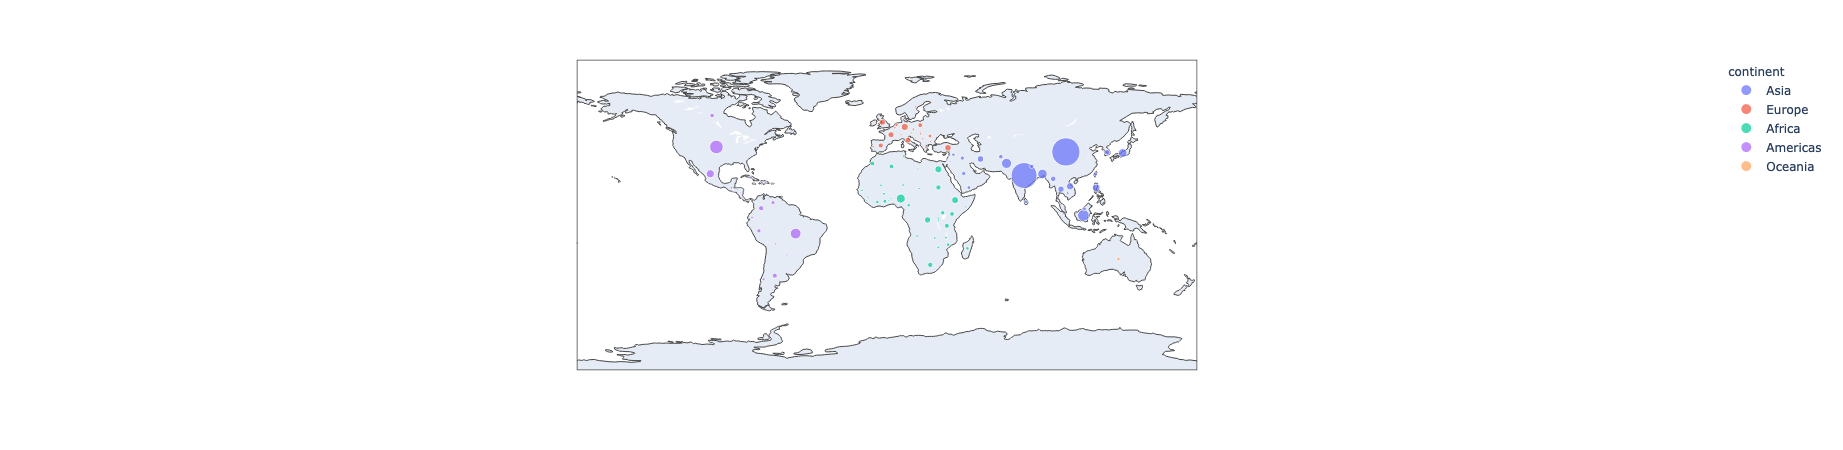

In [3]:
# example of bubble chart on the map
fig = px.scatter_geo(df.query("year==2007"), locations="iso_alpha", color="continent", size="pop")
fig.show()

**Task:** Using scatter plot, find a relationship between the life expectancy (lifeExp) and GDP gdpPercap in 2007. 

In [4]:
df_2 = df.query("year==2007")
df_2.head()

country continent  year  lifeExp       pop     gdpPercap iso_alpha  \
11  Afghanistan      Asia  2007   43.828  31889923    974.580338       AFG   
23      Albania    Europe  2007   76.423   3600523   5937.029526       ALB   
35      Algeria    Africa  2007   72.301  33333216   6223.367465       DZA   
47       Angola    Africa  2007   42.731  12420476   4797.231267       AGO   
59    Argentina  Americas  2007   75.320  40301927  12779.379640       ARG   

    iso_num  
11        4  
23        8  
35       12  
47       24  
59       32

In [5]:
df_2.shape

(142, 8)

In [6]:
df_2.dtypes

country       object
continent     object
year           int64
lifeExp      float64
pop            int64
gdpPercap    float64
iso_alpha     object
iso_num        int64
dtype: object

In [7]:
df_2.describe()

year     lifeExp           pop     gdpPercap     iso_num
count   142.0  142.000000  1.420000e+02    142.000000  142.000000
mean   2007.0   67.007423  4.402122e+07  11680.071820  425.880282
std       0.0   12.073021  1.476214e+08  12859.937337  249.111541
min    2007.0   39.613000  1.995790e+05    277.551859    4.000000
25%    2007.0   57.160250  4.508034e+06   1624.842248  209.500000
50%    2007.0   71.935500  1.051753e+07   6124.371109  410.000000
75%    2007.0   76.413250  3.121004e+07  18008.835640  636.000000
max    2007.0   82.603000  1.318683e+09  49357.190170  894.000000

In [8]:
df_2.describe(include='object')

country continent iso_alpha
count      142       142       142
unique     142         5       141
top      Ghana    Africa       KOR
freq         1        52         2

In [9]:
# First, try a regular scatter plot.

# create the data

data = [
    go.Scatter(
        x = df_2['gdpPercap'],
        y = df_2['lifeExp'],
        mode = 'markers'
    )
]

# create the layout 

layout = go.Layout(
    title = {
        'text': 'Life Expectancy Versus GDP Per Capita',
        'x': 0.5
    },
    xaxis = dict(title = 'GDP Per Capita ($)'), 
    yaxis = {
        'title': 'Life Expectancy (Years)',
        'range': [0, 90],
        'dtick': 10
    },
    hovermode ='closest',
    autosize = False,
    width = 900,
    height = 500
)

# create the figure
fig = go.Figure(data=data, layout=layout)
fig.show()


From the above scatter plot, it appears that Life Expectancy 
is a logarithmic function of GDP Per Capita ($).

We will also look at the same plot but we will
use a logarithmic scale for GDP Per Capita ($).

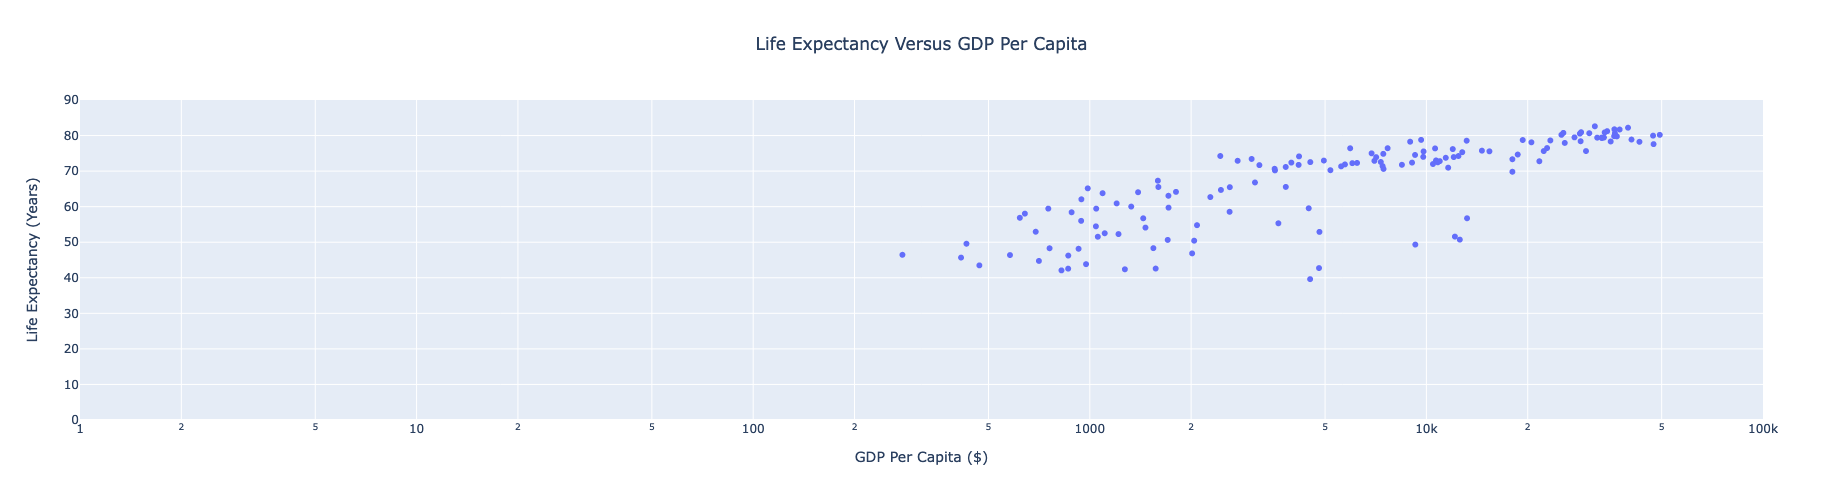

In [10]:
# Now, try a log plot.

# create the data

data = [
    go.Scatter(
        x = df_2['gdpPercap'],
        y = df_2['lifeExp'],
        mode = 'markers'
    )
]

# create the layout 

layout = go.Layout(
    title = {
        'text': 'Life Expectancy Versus GDP Per Capita',
        'x': 0.5
    },
    xaxis = {
        'title': 'GDP Per Capita ($)',
        'type': 'log',
        'range': [0, 5]
    },
    yaxis = {
        'title': 'Life Expectancy (Years)',
        'range': [0, 90],
        'dtick': 10
    },
    hovermode ='closest',
    autosize = False,
    width = 800,
    height = 500
)

# create the figure
fig = go.Figure(data=data, layout=layout)
fig.show()


## Covid 19 Data

In [11]:
## COVID-19 Data
country_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv')
# country_df

In [12]:
country_df

Country_Region          Last_Update        Lat       Long_  \
0             Afghanistan  2023-03-10 13:21:02  33.939110   67.709953   
1                 Albania  2023-03-10 13:21:02  41.153300   20.168300   
2                 Algeria  2023-03-10 13:21:02  28.033900    1.659600   
3                 Andorra  2023-03-10 13:21:02  42.506300    1.521800   
4                  Angola  2023-03-10 13:21:02 -11.202700   17.873900   
..                    ...                  ...        ...         ...   
196    West Bank and Gaza  2023-03-10 13:21:02  31.952200   35.233200   
197  Winter Olympics 2022  2023-03-10 13:21:02  39.904200  116.407400   
198                 Yemen  2023-03-10 13:21:02  15.552727   48.516388   
199                Zambia  2023-03-10 13:21:02 -13.133897   27.849332   
200              Zimbabwe  2023-03-10 13:21:02 -19.015438   29.154857   

     Confirmed  Deaths  Recovered  Active  Incident_Rate  People_Tested  \
0       209484    7896        NaN     NaN     538.127222            NaN   
1       334457    3598        NaN     NaN   11621.968170            NaN   
2       271496    6881        NaN     NaN     619.132366            NaN   
3        47890     165        NaN     NaN   61981.492267            NaN   
4       105288    1933        NaN     NaN     320.352770            NaN   
..         ...     ...        ...     ...            ...            ...   
196     703228    5708        NaN     NaN   13784.956961            NaN   
197        535       0        NaN     NaN            NaN            NaN   
198      11945    2159        NaN     NaN      40.048994            NaN   
199     343135    4057        NaN     NaN    1866.491630            NaN   
200     264276    5671        NaN     NaN    1778.088529            NaN   

     People_Hospitalized  Mortality_Rate   UID ISO3  Cases_28_Days  \
0                    NaN        3.769262     4  AFG            680   
1                    NaN        1.075774     8  ALB            228   
2                    NaN        2.534476    12  DZA             90   
3                    NaN        0.344540    20  AND             30   
4                    NaN        1.835917    24  AGO            104   
..                   ...             ...   ...  ...            ...   
196                  NaN        0.811686   275  PSE              0   
197                  NaN        0.000000  2022  NaN              0   
198                  NaN       18.074508   887  YEM              0   
199                  NaN        1.182333   894  ZMB           1021   
200                  NaN        2.145863   716  ZWE           1193   

     Deaths_28_Days  
0               0.0  
1               2.0  
2               0.0  
3               0.0  
4               2.0  
..              ...  
196             0.0  
197             0.0  
198             0.0  
199             7.0  
200            12.0  

[201 rows x 16 columns]

We do some preprocessing for you!

In [13]:
country_df.columns = map(str.lower, country_df.columns)
country_df = country_df.rename(columns={'country_region': 'country', 'long_': 'long', 'iso3':'iso'})

In [14]:
country_df.head()

country          last_update       lat       long  confirmed  deaths  \
0  Afghanistan  2023-03-10 13:21:02  33.93911  67.709953     209484    7896   
1      Albania  2023-03-10 13:21:02  41.15330  20.168300     334457    3598   
2      Algeria  2023-03-10 13:21:02  28.03390   1.659600     271496    6881   
3      Andorra  2023-03-10 13:21:02  42.50630   1.521800      47890     165   
4       Angola  2023-03-10 13:21:02 -11.20270  17.873900     105288    1933   

   recovered  active  incident_rate  people_tested  people_hospitalized  \
0        NaN     NaN     538.127222            NaN                  NaN   
1        NaN     NaN   11621.968170            NaN                  NaN   
2        NaN     NaN     619.132366            NaN                  NaN   
3        NaN     NaN   61981.492267            NaN                  NaN   
4        NaN     NaN     320.352770            NaN                  NaN   

   mortality_rate  uid  iso  cases_28_days  deaths_28_days  
0        3.769262    4  AFG            680             0.0  
1        1.075774    8  ALB            228             2.0  
2        2.534476   12  DZA             90             0.0  
3        0.344540   20  AND             30             0.0  
4        1.835917   24  AGO            104             2.0

In [15]:
country_df.shape

(201, 16)

In [16]:
country_df.dtypes

country                 object
last_update             object
lat                    float64
long                   float64
confirmed                int64
deaths                   int64
recovered              float64
active                 float64
incident_rate          float64
people_tested          float64
people_hospitalized    float64
mortality_rate         float64
uid                      int64
iso                     object
cases_28_days            int64
deaths_28_days         float64
dtype: object

In [17]:
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   country              201 non-null    object 
 1   last_update          201 non-null    object 
 2   lat                  199 non-null    float64
 3   long                 199 non-null    float64
 4   confirmed            201 non-null    int64  
 5   deaths               201 non-null    int64  
 6   recovered            0 non-null      float64
 7   active               0 non-null      float64
 8   incident_rate        196 non-null    float64
 9   people_tested        0 non-null      float64
 10  people_hospitalized  0 non-null      float64
 11  mortality_rate       201 non-null    float64
 12  uid                  201 non-null    int64  
 13  iso                  197 non-null    object 
 14  cases_28_days        201 non-null    int64  
 15  deaths_28_days       200 non-null    flo

In [18]:
country_df.describe()

lat        long     confirmed        deaths  recovered  active  \
count  199.000000  199.000000  2.010000e+02  2.010000e+02        0.0     0.0   
mean    18.730091   21.601355  3.366219e+06  3.423858e+04        NaN     NaN   
std     24.708224   67.238747  1.012282e+07  1.108274e+05        NaN     NaN   
min    -71.949900 -175.198200  1.000000e+00  0.000000e+00        NaN     NaN   
25%      4.064892   -6.319850  3.749100e+04  3.720000e+02        NaN     NaN   
50%     17.357822   21.005900  3.173670e+05  3.164000e+03        NaN     NaN   
75%     40.106100   49.533194  1.704502e+06  1.907100e+04        NaN     NaN   
max     64.963100  178.065000  1.038043e+08  1.123836e+06        NaN     NaN   

       incident_rate  people_tested  people_hospitalized  mortality_rate  \
count     196.000000            0.0                  0.0      201.000000   
mean    17024.445212            NaN                  NaN        4.472958   
std     18863.623212            NaN                  NaN       42.272579   
min         0.003879            NaN                  NaN        0.000000   
25%      1212.303274            NaN                  NaN        0.516599   
50%      9781.598992            NaN                  NaN        1.075774   
75%     26743.612730            NaN                  NaN        1.918753   
max     69585.715128            NaN                  NaN      600.000000   

               uid  cases_28_days  deaths_28_days  
count   201.000000     201.000000      200.000000  
mean    531.935323   19975.427861      137.615000  
std     945.148116   86959.682983      733.444443  
min       4.000000       0.000000        0.000000  
25%     212.000000      16.000000        0.000000  
50%     428.000000     244.000000        0.000000  
75%     662.000000    3153.000000       35.250000  
max    9999.000000  959794.000000     9451.000000

In [19]:
country_df.describe(include='object')

country          last_update  iso
count                    201                  201  197
unique                   201                    2  197
top     Winter Olympics 2022  2023-03-10 13:21:02  MHL
freq                       1                  200    1

**Task:** Transform the number of confirmed cases to logarithmic scale.

In [20]:
# Import matplotlib.pyplot

import matplotlib.pyplot as plt

First, we will plot the distribution of confirmed cases.

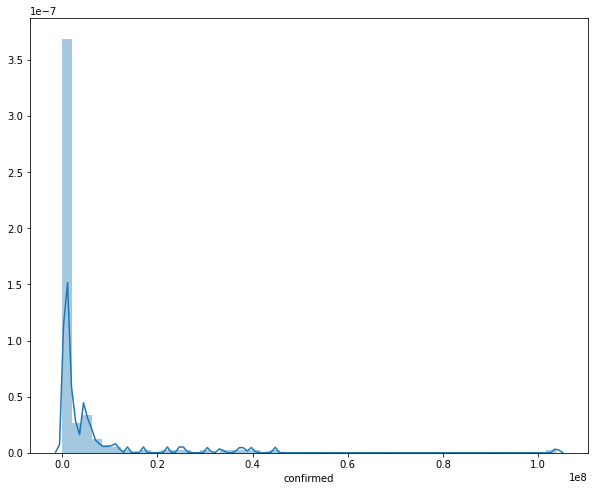

In [21]:
f, ax = plt.subplots(figsize=(10, 8))
fig = sns.distplot(country_df['confirmed'])

Now, we will apply a log transformation to confirmed cases.

In [22]:
country_df['confirmed_log'] = country_df['confirmed'].apply(np.log)

In [23]:
country_df['confirmed_log'].describe()

count    201.000000
mean      12.435897
std        2.881263
min        0.000000
25%       10.531856
50%       12.667814
75%       14.348784
max       18.458018
Name: confirmed_log, dtype: float64

Now, we will plot the distribution of the 'confirmed_log' variable.

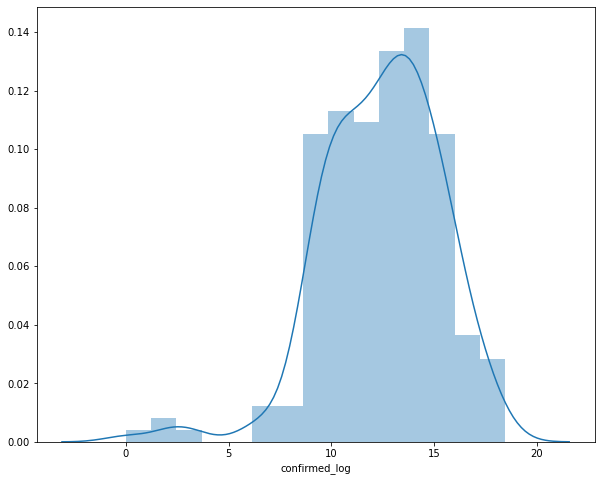

In [24]:
f, ax = plt.subplots(figsize=(10, 8))
fig = sns.distplot(country_df['confirmed_log'])

**Task:** create color scale of your choice.

In [25]:
c_scale = [
    'chartreuse',
    'yellow',
    'goldenrod',
    'darkorange',
    'red'
]

**Task:** create two bubble charts:
- the one where the size of a bubble is confirmed cases of covid-19 per country
- the one where the size of a bubble is confirmed deaths of covid-19 per country

Use color scale you created earlier.

First, we will create the bubble chart where the size of
a bubble is confirmed cases of covid-19 per country.

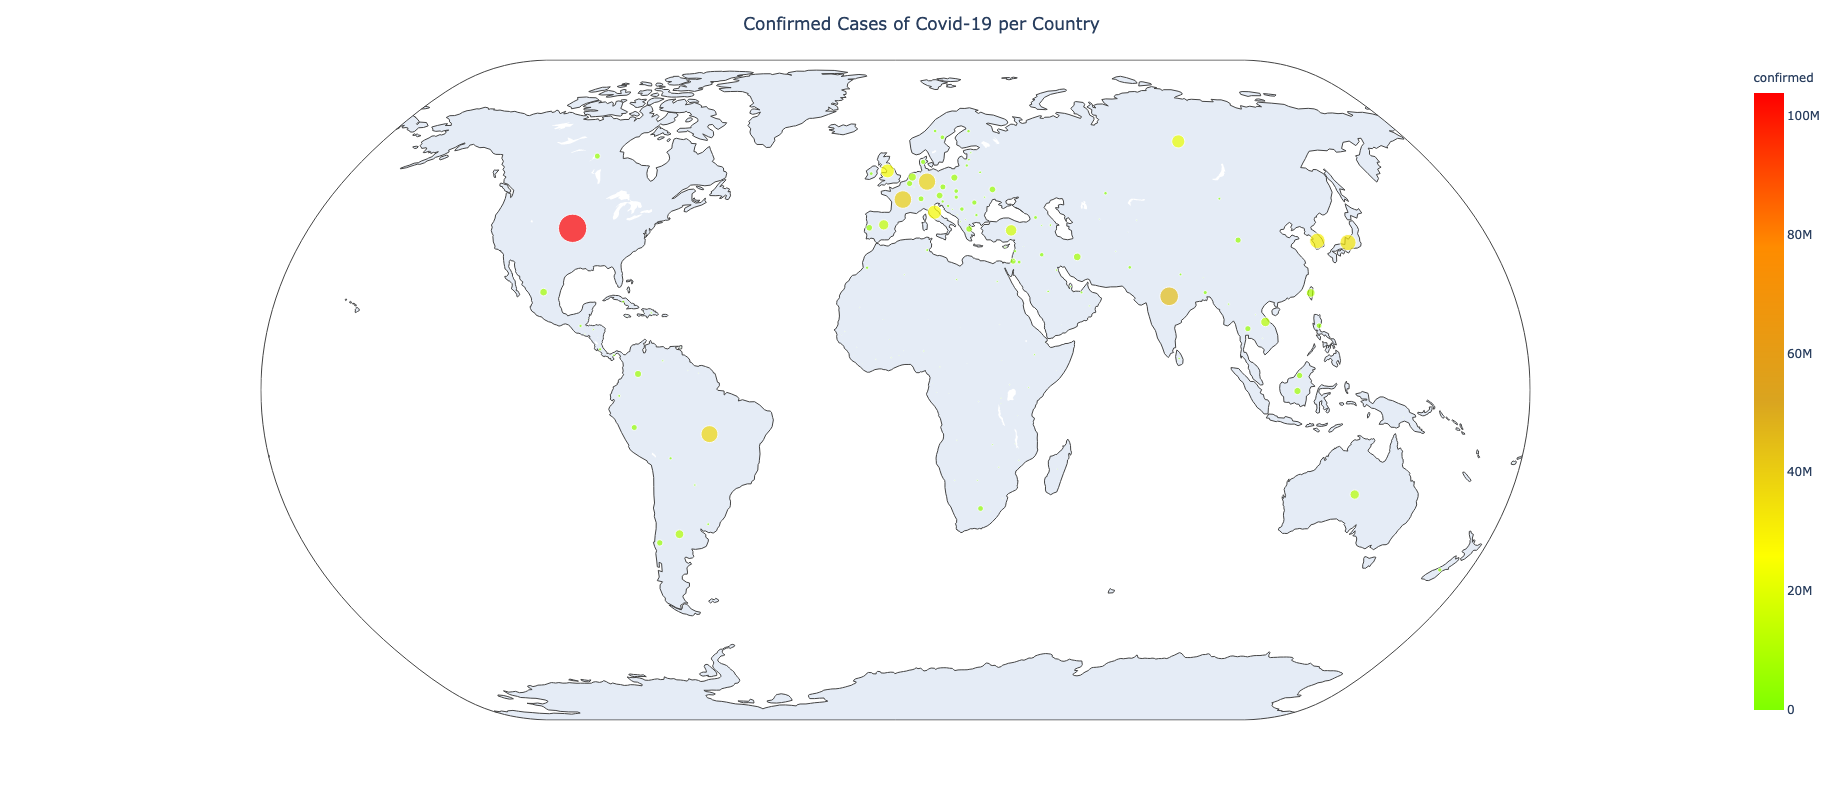

In [26]:
fig = px.scatter_geo(
    country_df, 
    locations="iso", 
    color="confirmed",
    hover_name="country", 
    size="confirmed",
    color_continuous_scale=c_scale,
    projection="natural earth",
    width=1000,
    height=800
)

fig.update_layout(
    title_text="Confirmed Cases of Covid-19 per Country", 
    title_x=0.5
)

fig.show()

Next, we will create the bubble chart where the size of 
a bubble is confirmed deaths of covid-19 per country.

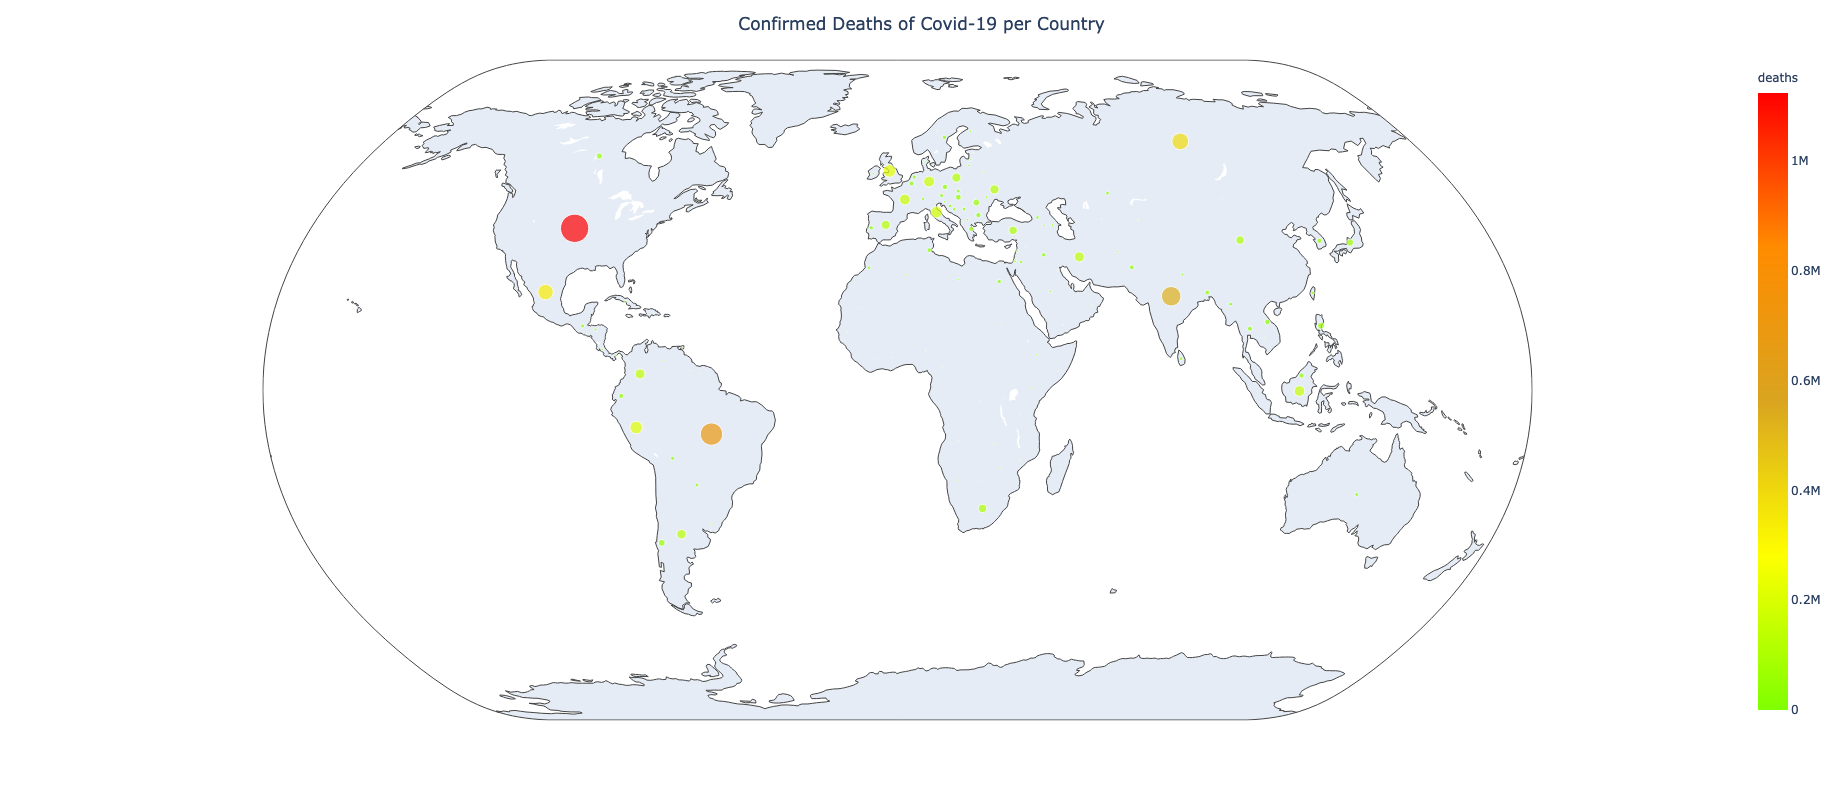

In [27]:
fig = px.scatter_geo(
    country_df, 
    locations="iso", 
    color="deaths",
    hover_name="country", 
    size="deaths",
    color_continuous_scale=c_scale,
    projection="natural earth",
    width=1000,
    height=800
)

fig.update_layout(
    title_text="Confirmed Deaths of Covid-19 per Country", 
    title_x=0.5
)

fig.show()

I think that the color scale works better with the second bubble map. 
Note that the bubble maps are similar.  This makes sense because the more cases
of Covid-19 that a country has, then the more deaths due to Covid-19 that a 
country has.

**Task:** create Choropleth map of the world where color of each country is based on the number of confirmed cases in the country

**Task:** Create a function which takes counry as input and plots a chart with three lines: 
1. number of confirmed cases
2. number of deaths
3. number of recovered people

Little preprocessing from us:

In [44]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
death_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recovered_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

confirmed_df.columns = map(str.lower, confirmed_df.columns)
confirmed_df = confirmed_df.rename(columns={'country/region': 'country', 'province/state': 'state'})

death_df.columns = map(str.lower, death_df.columns)
death_df = death_df.rename(columns={'country/region': 'country', 'province/state': 'state'})

recovered_df.columns = map(str.lower, recovered_df.columns)
recovered_df = recovered_df.rename(columns={'country/region': 'country', 'province/state': 'state'})

confirmed_clean  = confirmed_df.drop(['state', 'lat', 'long'], axis=1)
confirmed_clean.set_index('country', inplace=True)

death_clean  = death_df.drop(['state', 'lat', 'long'], axis=1)
death_clean.set_index('country', inplace=True)

recovered_clean  = recovered_df.drop(['state', 'lat', 'long'], axis=1)
recovered_clean.set_index('country', inplace=True)


**Task:** Create the same function but transform axis **y** to be on logarithmic scale.

## GDP data

In [39]:
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_world_gdp_with_codes.csv')
df.tail()

COUNTRY  GDP (BILLIONS) CODE
217  Virgin Islands            5.08  VGB
218       West Bank            6.64  WBG
219           Yemen           45.45  YEM
220          Zambia           25.61  ZMB
221        Zimbabwe           13.74  ZWE

**Task:** create Choropleth map with GDP of all countries

## Stretch
**Task**: In case you still have some time try to create some interesting charts from any data we have worked with in this activity.